In [1]:
#Import Stuff
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

One very iportant concept, especially for machine learning, is examining the relationship between two varaibles.
Take height and weight - as you look at taller people, they probably get heavier, but the relationship isn't exact. Danny DeVito is 4'8" and 194lb, NBA player Lonzo Ball is listed as 6'6" and 190lb! Clearly there's some variation in there.

We can analyze and measure the strength of these relationships of one varaible to another, and use that to better undertand our data, and do things like select varaibles for machine learning. 

A primary tool for examining these relationships is a scatter plot - one varaible on the X axis, the other on the Y, and a point for each value. The shape that all these points create will illustrate the relationship

In [2]:
#Load hieght weight data. 
df = pd.read_csv("cardio_train.csv", sep=";")
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#Change the days into years, so it is more understandable
df["age"] = round(df["age"]/365, 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


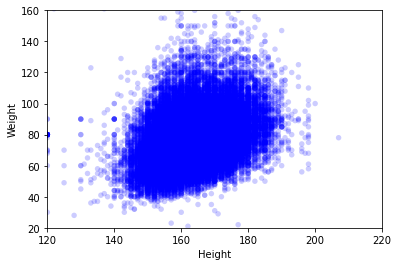

<Figure size 576x432 with 0 Axes>

In [5]:
#Create a scatterplot. Note scatterplots don't really need a preceeding object like a hist, it is just mapping points on a plot.
thinkplot.Scatter(df["height"], df["weight"])
thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])

In [6]:
#correlations
thinkstats2.Corr(df["height"], df["weight"]), thinkstats2.SpearmanCorr(df["height"], df["weight"])

(0.2909678349914979, 0.3135692698998496)

As people get taller, they get heavier. It isn't an extremely clear relationship though. 

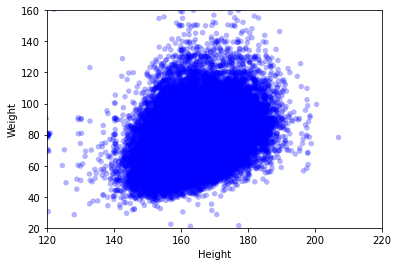

<Figure size 576x432 with 0 Axes>

In [7]:
#Add jitter
thinkplot.Scatter(thinkstats2.Jitter(df["height"]), thinkstats2.Jitter(df["weight"]), alpha=.3)
thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])

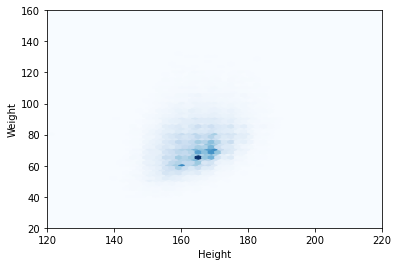

<Figure size 576x432 with 0 Axes>

In [8]:
#Hexbin
thinkplot.HexBin(thinkstats2.Jitter(df["height"]), thinkstats2.Jitter(df["weight"]))
thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])

All of these visualizations show the same basic thing - the relationship between height and weight. 

We can measure the strength of that relationship, that's called correlation.

In [9]:
#Calculate both correlation metrics
a=df["height"].values.tolist()
b=df["weight"].values.tolist()
thinkstats2.Corr(a, b), thinkstats2.SpearmanCorr(a,b)
#a,b

(0.2909678349914979, 0.3135692698998496)

In [10]:
#Cut down data to only numeric values, and fliter out some outliers. 
df2 = df[["age", "gender", "height", "weight", "ap_lo", "ap_hi"]]
df2 = df2[(df2["height"]>110) & (df2["height"] < 200)]

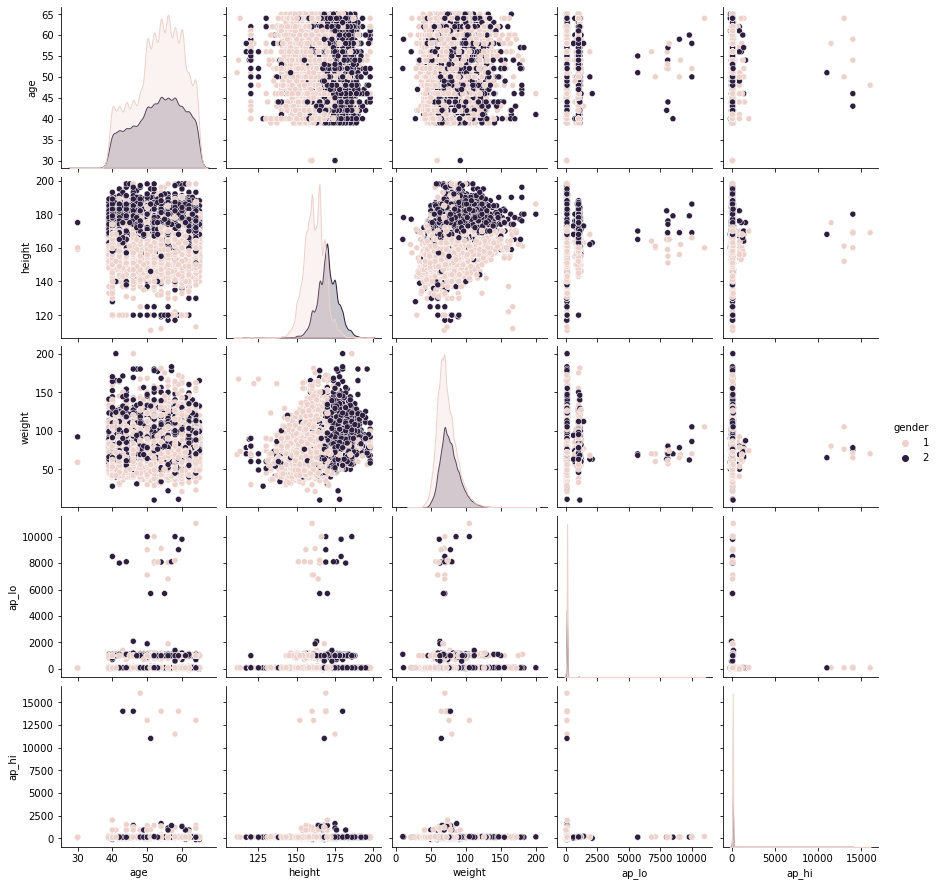

In [11]:
#Generate pairplot
sns.pairplot(df2, dropna=True, hue="gender")
plt.show()

<AxesSubplot:xlabel='height', ylabel='weight'>

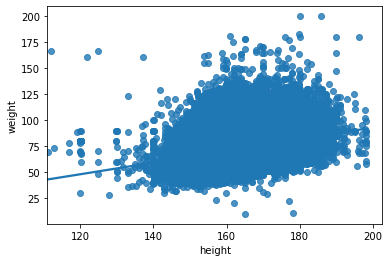

In [12]:
#Generate regression plot (pretty scatterplot with regression)
sns.regplot(x=df2["height"], y=df2["weight"], robust=True, data=df2, n_boot=1000, x_jitter=.2, y_jitter=.2, ci=85)

We can now load some different data, do some data cleanup, and look at correlations a bit more. 

In [13]:
#Load drug dataset and drop some values, so the total volume of data is manageable. 
drg = pd.read_csv("drug-use-by-age.csv")
drg = drg.drop(columns=["n", 'alcohol-frequency','marijuana-frequency', 'cocaine-frequency','crack-frequency', 'heroin-frequency','hallucinogen-frequency', 'inhalant-frequency',
    'pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency', 'pain-releiver-use', 'stimulant-use'])
drg.head(10)

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,oxycontin-use,tranquilizer-use,meth-use,sedative-use
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,0.1,0.2,0.0,0.2
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,0.1,0.3,0.1,0.1
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,0.4,0.9,0.1,0.2
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,0.8,2.0,0.3,0.4
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,1.1,2.4,0.3,0.2
5,17,49.3,28.0,2.0,0.1,0.1,4.8,2.0,1.4,3.5,0.6,0.5
6,18,58.7,33.7,3.2,0.4,0.4,7.0,1.8,1.7,4.9,0.5,0.4
7,19,64.6,33.4,4.1,0.5,0.5,8.6,1.4,1.5,4.2,0.4,0.3
8,20,69.7,34.0,4.9,0.6,0.9,7.4,1.5,1.7,5.4,0.9,0.5
9,21,83.2,33.0,4.8,0.5,0.6,6.3,1.4,1.3,3.9,0.6,0.3


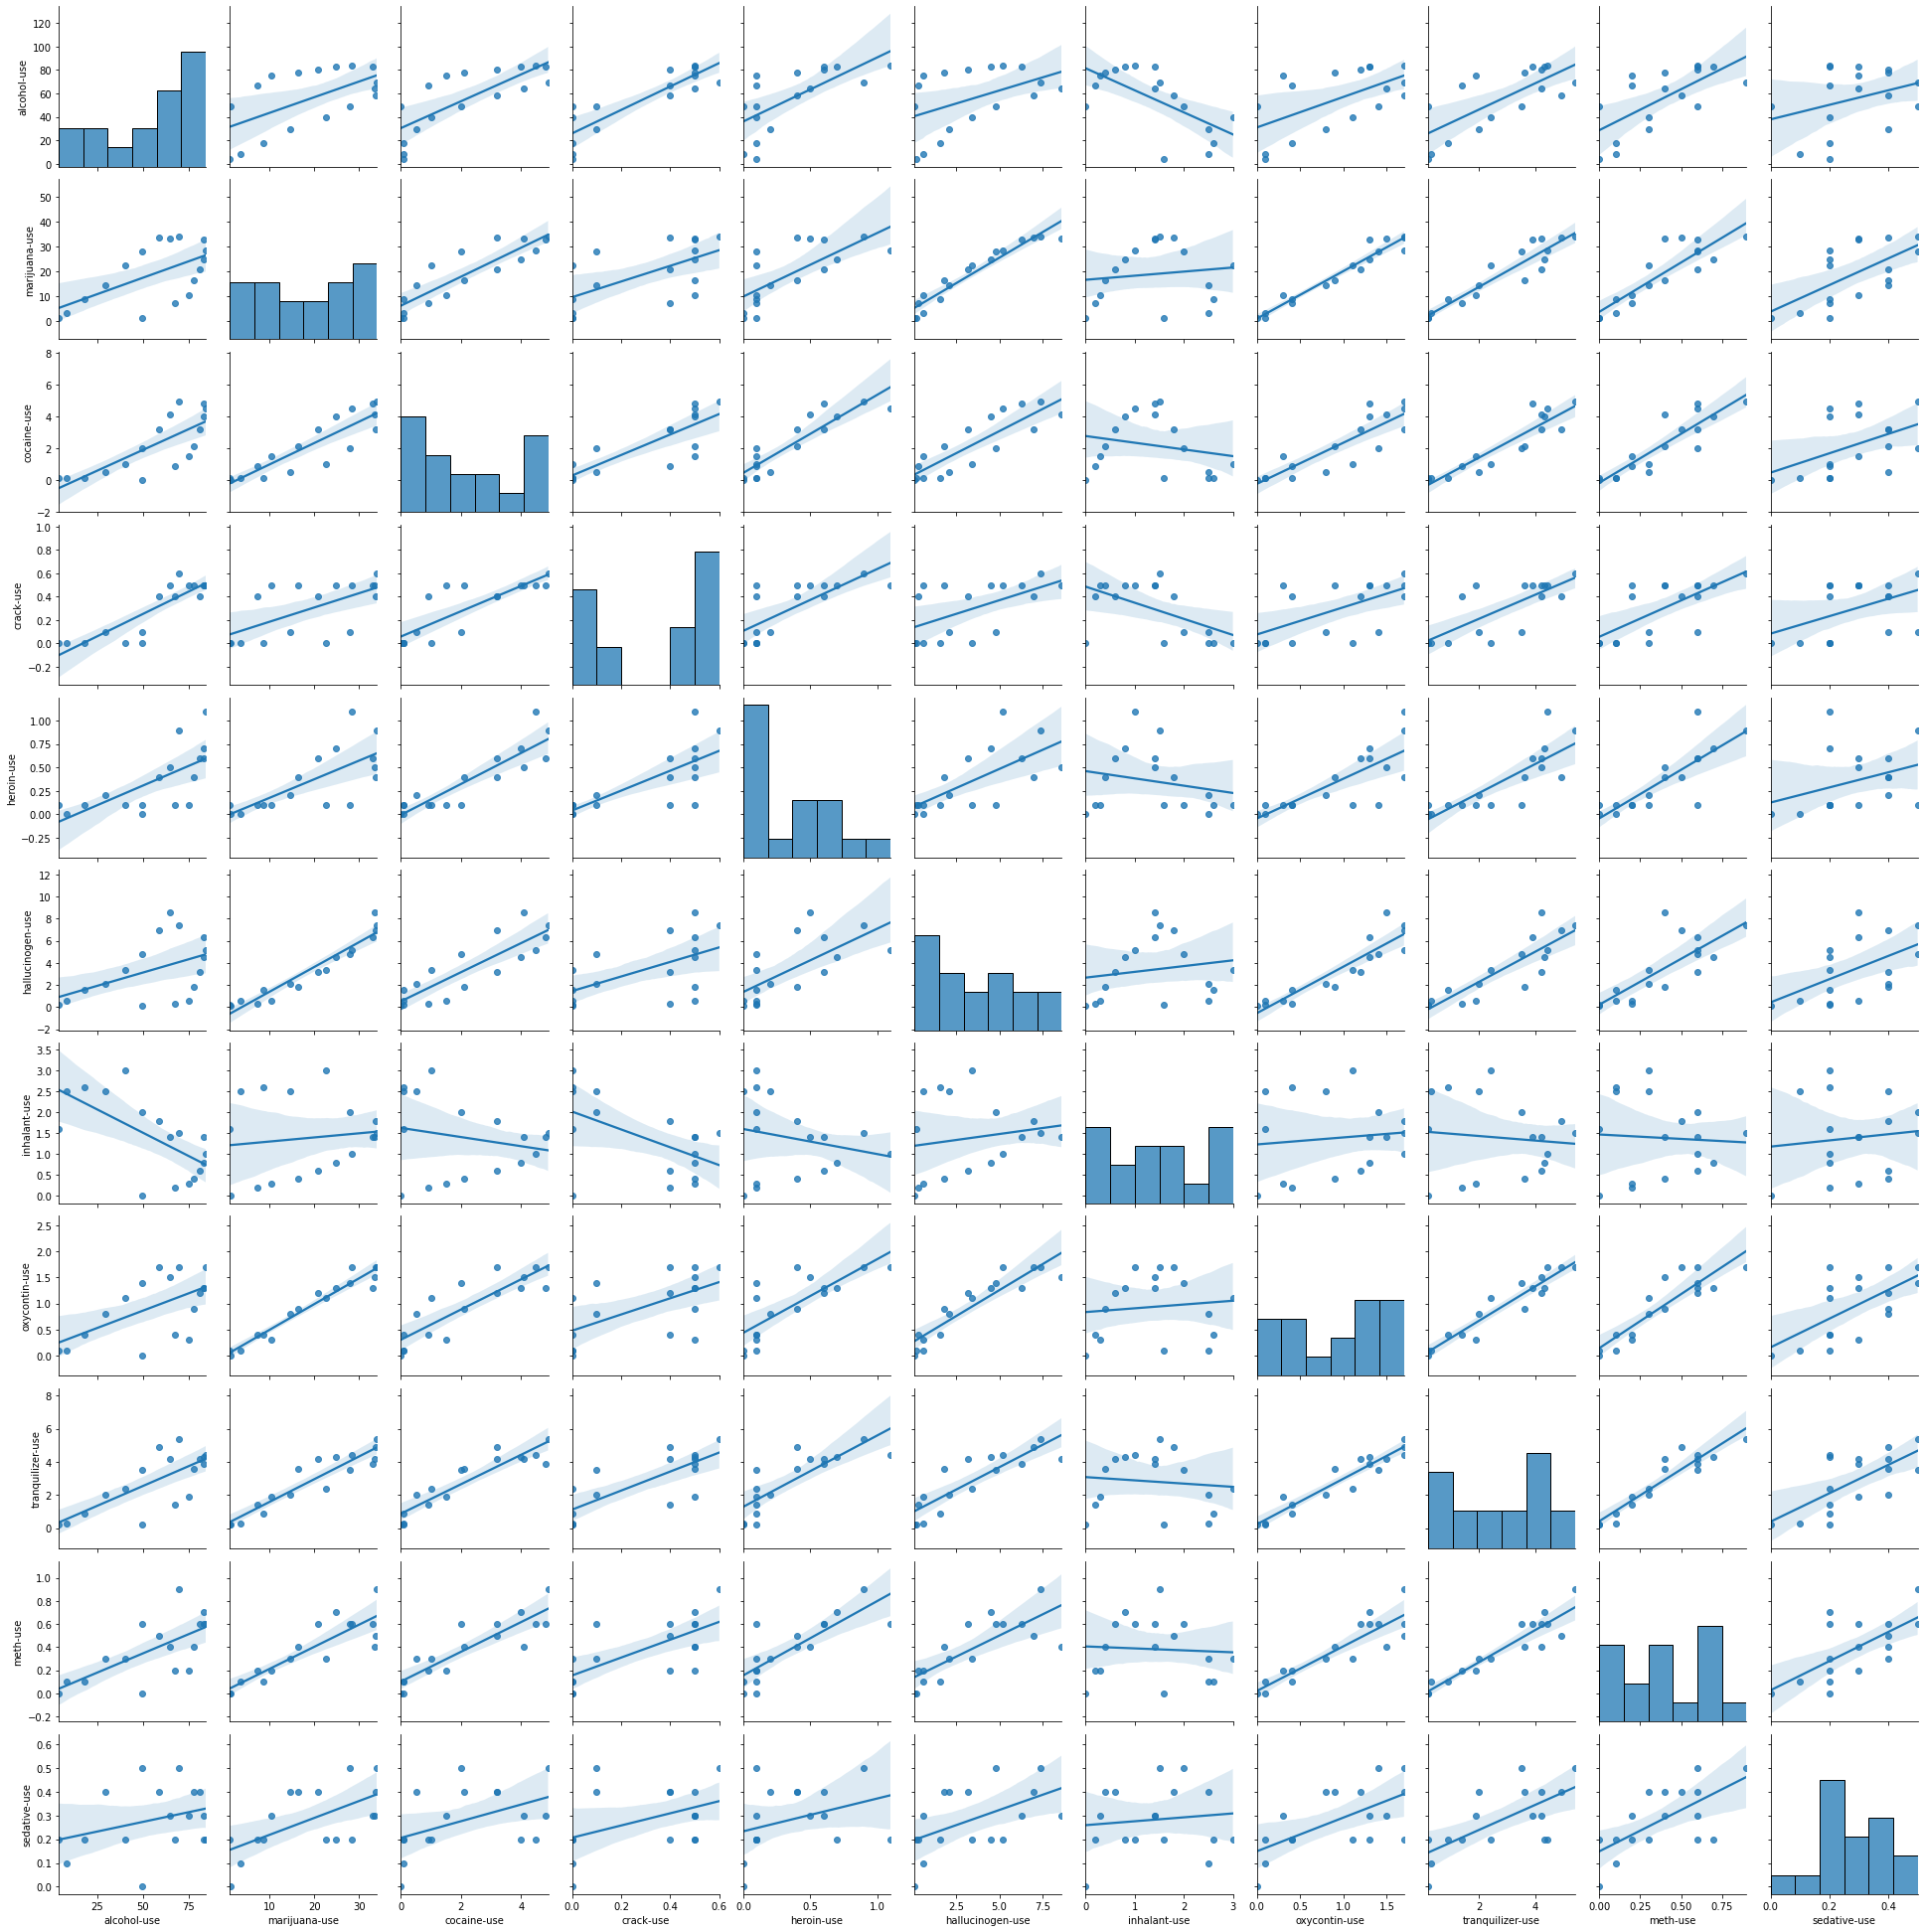

In [14]:
#Generate pairplot
sns.pairplot(drg, dropna=True, kind="reg")
plt.show()

In [15]:
#corr b/w oxy and tranq
thinkstats2.Corr(drg["oxycontin-use"], drg["tranquilizer-use"])

0.9550806511348201

In [16]:
#Take the data in our dataframe, and change it into a set of correlations. 
drg2 = drg.apply(pd.to_numeric, errors='coerce')
drg2 = drg2.drop(columns=["age"])
drg2 = drg2.corr()
drg2.head()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,oxycontin-use,tranquilizer-use,meth-use,sedative-use
alcohol-use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.589219,0.735785,0.682531,0.318268
marijuana-use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.971733,0.935199,0.870446,0.616766
cocaine-use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.865626,0.920430,0.889353,0.461914
crack-use,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.603003,0.772651,0.694324,0.438421
heroin-use,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.775321,0.818583,0.816620,0.333649


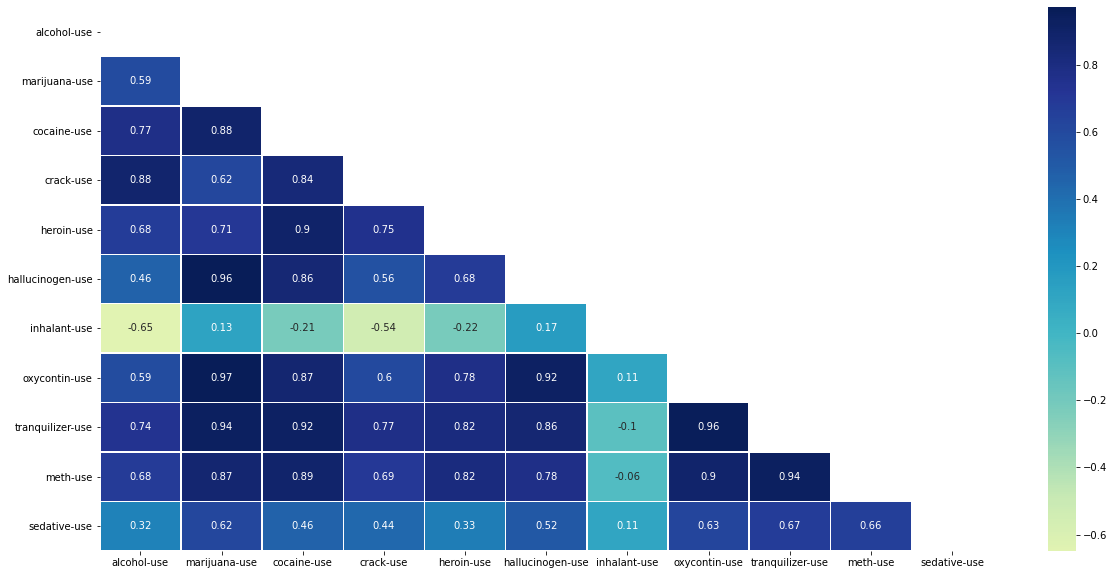

In [17]:
#Show Correlations in heatmap
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(drg2, dtype=bool))
sns.heatmap(drg2, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

We can use our newfound correlation skills to look at something near and dear to my heart - diabetes!

In this data we have a bunch of common values that are tracked for diabetic people, the Outcome varaible is a measure of if that person has diabetes. 

Part 1: Load some data and take a preview. Look for correlations visually and calculate some that appear to be correlated numerically. 

In [18]:
#Read Diabetic Data and change to mmol/L, ditch 0 glucose (errors)
d = pd.read_csv("diabetes.csv")
d["Glucose"] = d["Glucose"]/18.018
#My initial dataframe name is just d, filename is diabetes.csv
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,8.214008,72,35,0,33.6,0.627,50,1
1,1,4.717505,66,29,0,26.6,0.351,31,0
2,8,10.156510,64,0,0,23.3,0.672,32,1
3,1,4.939505,66,23,94,28.1,0.167,21,0
4,0,7.603508,40,35,168,43.1,2.288,33,1


In [19]:
#Describe data 
d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,6.709653,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,1.774482,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,5.494505,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,6.493506,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,7.783883,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,11.044511,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


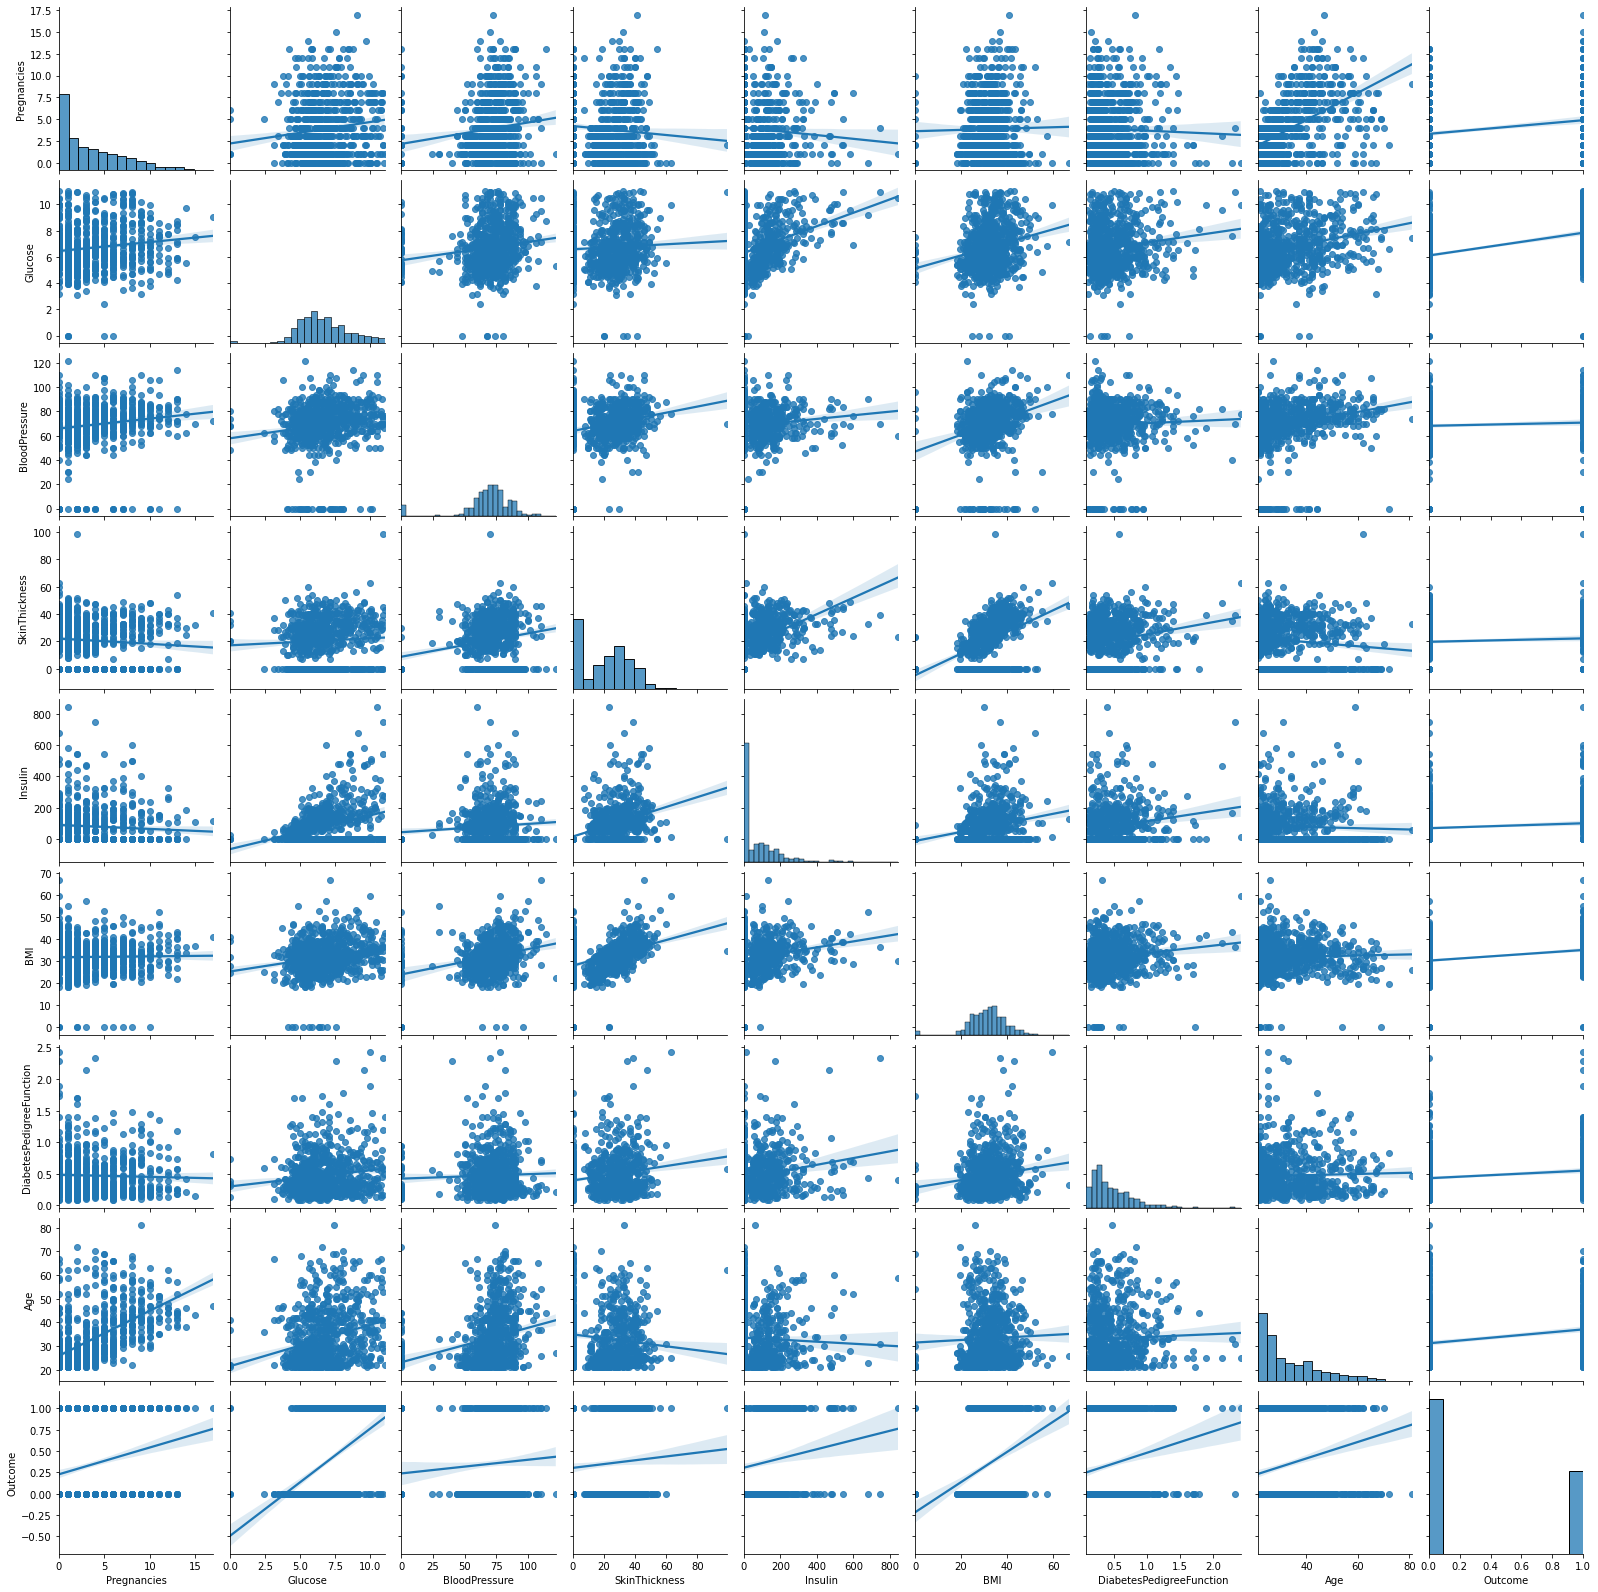

In [20]:
#Look for correlations visually
sns.pairplot(d, dropna=True, kind="reg")
plt.show()

In [21]:
#Calculate some correleations. Use both regular correlation and spearman. 
thinkstats2.Corr(d["BloodPressure"], d["BMI"]), thinkstats2.SpearmanCorr(d["Glucose"], d["Outcome"])

(0.2818052888499106, 0.47577630645832675)

One thing jumped out there - there are several things with 0 or near 0 values that don't make sense, e.g. Blood Pressure, skin thickness, and BMI

We should clean up our data and then look again. 

NOTE: Do not filter out 0 Insulin people, that is a valid measure. 
Part 2: Refine our examination. This time, add: hue="Outcome" as an argument in the pairplot. 

In [22]:
#Filter out 0s. Rerun graphs. 
d = d[d["BMI"] > 0]
d = d[d["BloodPressure"] > 0]
d = d[d["SkinThickness"] > 0]
d = d[d["Glucose"] > 0]
d = d[d["Insulin"] > 0]

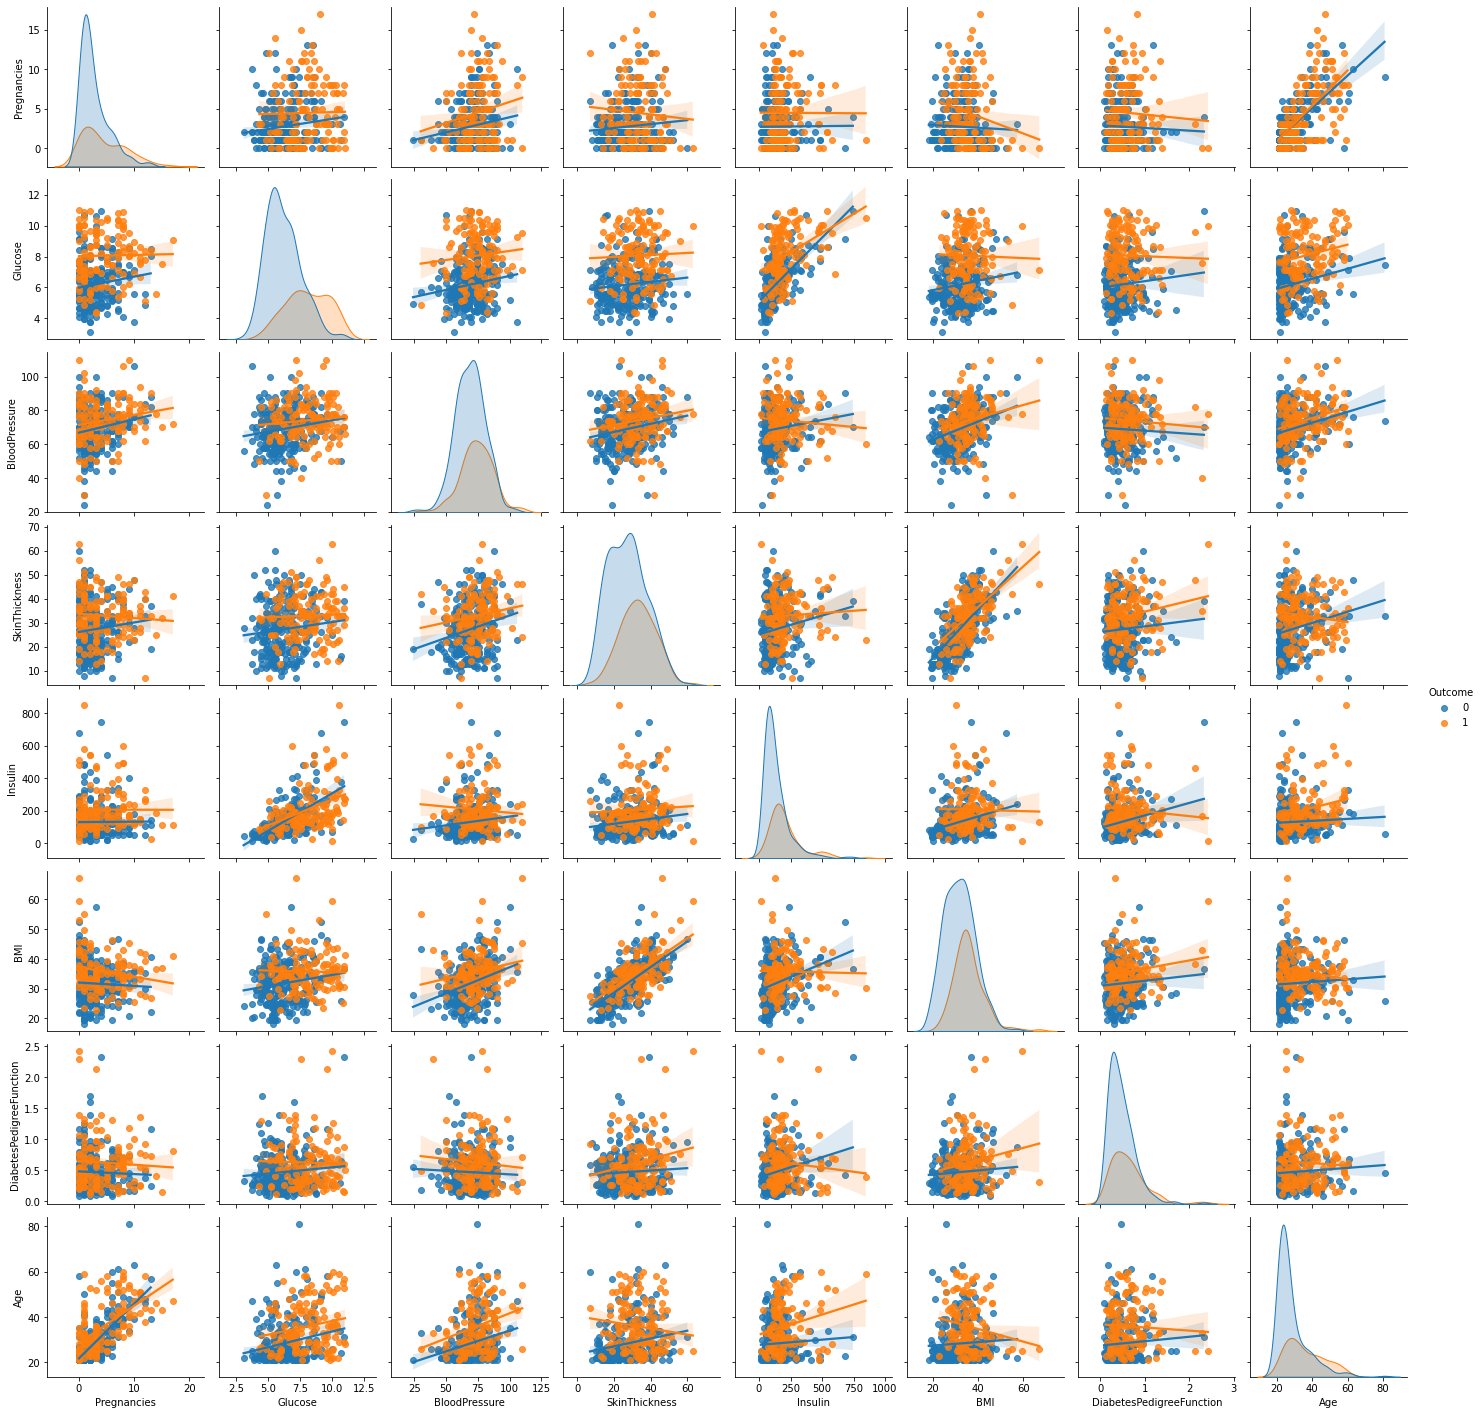

In [23]:
#Look for correlations visually with updated data. 
sns.pairplot(d, dropna=True, kind="reg", hue="Outcome") #The hue colors the diabetic people differently
plt.show()

That cleans up our data a little. Since this data is about a glucose test, we can detour to examine glucose more closely...

Part 3: Examine the distribution of glucose:

In [24]:
#Calculate some correleations
print("BMI-SkinThickness:", thinkstats2.Corr(d["BMI"], d["SkinThickness"]), thinkstats2.SpearmanCorr(d["BMI"], d["SkinThickness"]))
print("Glucose-Insulin:", thinkstats2.Corr(d["Glucose"], d["Insulin"]), thinkstats2.SpearmanCorr(d["Glucose"], d["Insulin"]))
print("Glucose-BP:", thinkstats2.Corr(d["Glucose"], d["BloodPressure"]), thinkstats2.SpearmanCorr(d["Glucose"], d["BloodPressure"]))

BMI-SkinThickness: 0.664354866692933 0.6743929276918603
Glucose-Insulin: 0.5812230123542532 0.6589582173536136
Glucose-BP: 0.2100265736477534 0.2366093060205946


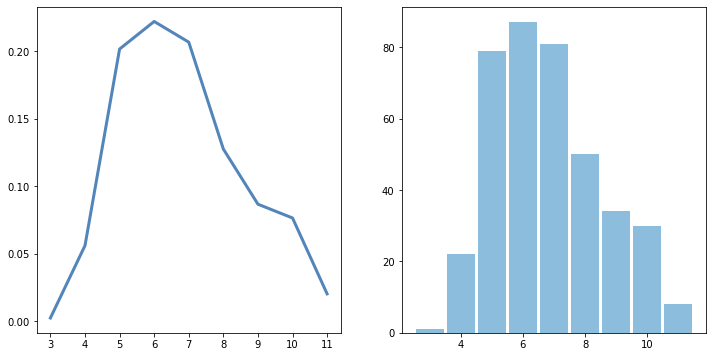

In [25]:
#Look at glucose overall first. 
thinkplot.PrePlot(2,1,2)
pmf = thinkstats2.Pmf(round(d["Glucose"], 0))
thinkplot.Pdf(pmf)
thinkplot.SubPlot(2)
hist = thinkstats2.Hist(round(d["Glucose"],0))
thinkplot.Hist(hist)
thinkplot.Config()

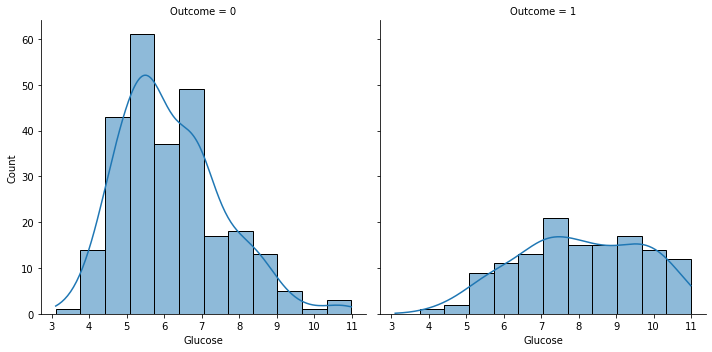

In [26]:
#Split by if you're diabetic or not. and look at glucose distribution for each group

#NOTE THIS ONE USES A NEW SNS FUNCTION. IT MAY NOT WORK FOR YOU. USE DISTPLOT LIKE THE PREVIOUS EXAMPLE AND ADAPT IT
#OR USE THINKPLOT LIKE ABOVE. THIS DEPENDS ON THE VERSION OF SEABORN THAT IS INSTALLED ON YOUR COMPUTER, NOT ANYTHING YOU'VE DONE.
sns.displot(data=d, x="Glucose", kde=True, col="Outcome")

Whoa! Way different. Diabetic people are in shambles and normal people are... well... normal. 

We can take our normal people and treat them as normal - quick detour into analytical distributions....

Part 4: Take non diabetic people and create analytical distribution for them. 

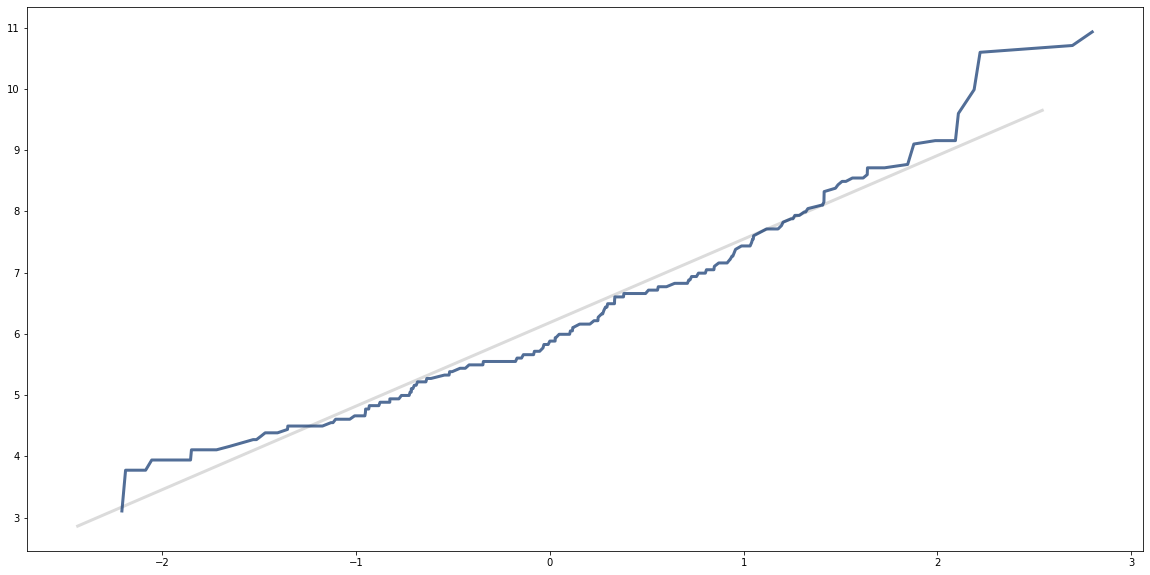

In [27]:
#Non-Diabetic people are normal!?! Look at a Normal Probability Plot to assess. 
d_neg = d[d["Outcome"]==0]
thinkstats2.NormalProbabilityPlot(d_neg["Glucose"])

The normal probability plot looks pretty good. Why don't we make an analytical distribution out of our data?

In [28]:
#Create a normal distribution. Because we have stated "it is normal", we only need mean and std to define it. 
norm = ss.norm(loc=d_neg["Glucose"].mean(), scale=d_neg["Glucose"].std())
#Print some stats... Note mean and median. 
norm.cdf(6), norm.median(), norm.mean()

(0.44636032624933736, 6.184443207343973, 6.184443207343973)

C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


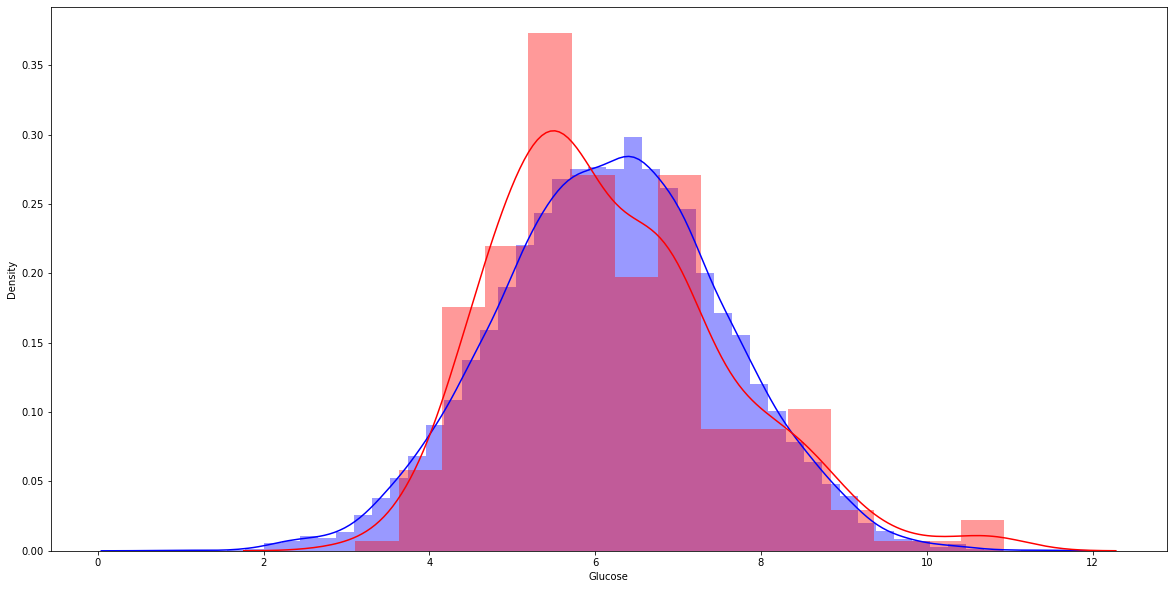

In [29]:
#Create a histogram - We will take our new distribution and create some random values mirroring that
sns.distplot(norm.rvs(size=10000), color="blue")
sns.distplot(d_neg["Glucose"], color="red")
plt.show()

By doing what we just did there, we effectively said - this is the distribution of glucose for non-diabetics, it is defined by this formula. The "ss.norm..." generates that formula if you provide mean and std. We can use that new analytical model to do stuff, like graph....

What may be concerning about that...?

Our distribution is more or less normal, but not perfect. Maybe we should consider the skew, and try to make it more accurate?

Part 5: Try to make more accurate analytic models

In [31]:
#What about muh skew?
#Skewnorm is another distribution - a normal one with some skew. We calculate it, and pass it to our distribution with a=VARAIBLE_NAME
#Other than that it is the same as above
meanGlu = d_neg["Glucose"].mean()
stdGlu = d_neg["Glucose"].std()
a = thinkstats2.PearsonMedianSkewness(d_neg["Glucose"])

norms = ss.skewnorm(loc=meanGlu, scale=stdGlu, a=a) 

norm.cdf(6), norm.median(), norm.mean(), a

(0.44636032624933736, 6.184443207343973, 6.184443207343973, 0.5405106748259663)

We can also just tell the system to figure it out for us....

In [32]:
#Create a model that is fitted to the data, automagically.
ae, loce, scalee = ss.skewnorm.fit(d_neg["Glucose"])
snormFit = ss.skewnorm(ae, loce, scalee)

C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

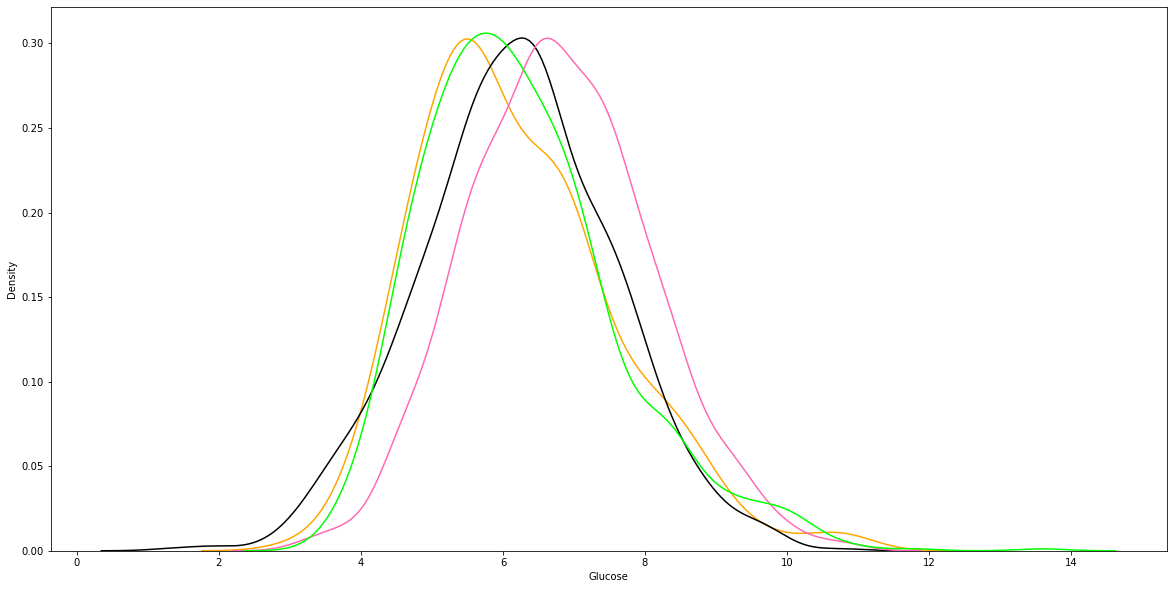

In [43]:
#Plot all the distributions together. 
sns.distplot(d_neg["Glucose"], color="orange", hist=False)
sns.distplot(norm.rvs(size=1000), color="black", hist=False)
sns.distplot(norms.rvs(1000), color="hotpink", hist=False)
sns.distplot(snormFit.rvs(1000), color="lime", hist=False)
plt.show()

Once we have an analytical distribution that mirrors our data closely enough, we can use it. Some caveats:

- The more data we have, the more likely we are able to make an accurate model. Generalizing from a small amount of data is more risky. 

- The closer the distribution is to the distribution you pick, the better. Many are normal, but not all. 

- Does our sample realistically match the population we are modelling? For us, this data comes from a glucose tolerance test, which is one way that doctors diagnose diabetes. You're given a glass of orange juice, then your blood sugar is measured 2 hours later. If it is really high, you're probably diabetic. Most people who have no medical issues wouldn't do this, so we probably should expect our data to be different than the total population. 

In [54]:
#How many people have a blood glucose in an optimal range (3.9-5.4)
#We can use all of our distributions to make a cdf based caculation, like the examples before
low = 3.9
high = 5.4

cdfNeg = thinkstats2.Cdf(d_neg["Glucose"])
print("Normal Distribution:", norm.cdf(high)-norm.cdf(low))
print("Skew Distribution:", norms.cdf(high)-norms.cdf(low))
print("Fitted SkewNorm:", snormFit.cdf(high)-snormFit.cdf(low))
print("Fitted Distribution:", cdfNeg.Prob(high)-cdfNeg.Prob(low))

Normal Distribution: 0.23570328203643806
Skew Distribution: 0.13854120689061328
Fitted SkewNorm: 0.3018159160731146
Fitted Distribution: 0.29389312977099236


Enough with the normies, we can go back to looking at diabetics.

For people with diabetes, inspect for correlations. 

Part 6: Dead pancreas society

In [ ]:
#Take diabetic people and look for correlations


In [ ]:
#Calculate some correleations

In [ ]:
#How many diabetic people fall into that healthy range?

Part 7: Correlation Matrix for diabetics. 

In [ ]:
#Create correlation dataframe
tmp = d_pos.drop(columns=["Outcome"])
posCor = tmp.corr()
posCor.head()

In [ ]:
#Plot correlation matrix
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(posCor, dtype=bool))
sns.heatmap(posCor, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

One last thing that jumps out - the insulin column. If you are (type 1 fully) diabetic, you may have no insulin in your system. If you're type 2, you'd expect insulin to skyrocket. What if we split the data along that line?

Part 8: Segregate Insulin Havers 

In [ ]:
#Split into two groups. 


In [ ]:
#Look at glucose distribution visually for both

In [ ]:
#Plot people for correlations, use hue to separate insuling havers vs not. 